In [20]:
import click
from pysr import pysr, best, get_hof
import pandas as pd
import os 
from dispersant_screener.definitions import FEATURES
from sklearn.preprocessing import StandardScaler
import numpy as np 

import matplotlib.pylab as plt 

DATADIR = '../data'

In [11]:
def load_data(n_samples, label_scaling: bool = False):
    """Take in Brian's data and spit out some numpy arrays for the PAL"""
    df_full_factorial_feat = pd.read_csv(os.path.join(DATADIR, 'new_features_full_random.csv'))[FEATURES].values
    a2 = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_virial_large_new.csv'))['A2_normalized'].values
    deltaGMax = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_virial_large_new.csv'))['A2_normalized'].values  # pylint:disable=unused-variable
    gibbs = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_deltaG.csv'))['deltaGmin'].values * (-1)
    gibbs_max = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_virial_large_new.csv'))['deltaGmax'].values
    force_max = pd.read_csv(os.path.join(DATADIR, 'b1-b21_random_virial_large_fit2.csv'))['F_repel_max'].values  # pylint:disable=unused-variable
    rg = pd.read_csv(os.path.join(DATADIR, 'rg_results.csv'))['Rg'].values
    y = np.hstack([rg.reshape(-1, 1), gibbs.reshape(-1, 1), gibbs_max.reshape(-1, 1)])
    assert len(df_full_factorial_feat) == len(a2) == len(gibbs) == len(y)

    feat_scaler = StandardScaler()
    X = feat_scaler.fit_transform(df_full_factorial_feat)

    if label_scaling:
        label_scaler = MinMaxScaler()
        y = label_scaler.fit_transform(y)

    #greedy_indices = get_maxmin_samples(X, n_samples)

    return X, y#, greedy_indice

In [12]:
X, y = load_data(1)

In [22]:
equations

,Complexity,MSE,score,Equation,sympy_format,lambda_format
0,1,0.057234,0.000000,2.150166,2.15016600000000,<function _lambdifygenerated at 0x7fde0a0946a8>
1,6,0.009949,0.349927,"mult(exp(mult(x13, 0.10026504)), 2.139535)",2.139535*exp(0.10026504*x13),<function _lambdifygenerated at 0x7fde0a0df620>
2,7,0.009947,0.000257,"mult(exp(sin(mult(x13, 0.100746125))), 2.1395035)",2.1395035*exp(sin(0.100746125*x13)),<function _lambdifygenerated at 0x7fde0a16dd08>


In [23]:
equations = pysr(
    X,
    y[:, 0],
    niterations=100,
    select_k_features=20,
    binary_operators=["plus", "mult", "div"],
    unary_operators=["cos", "exp", "sin", "neg", "square", "cube", "logm", "sqrtm"],
    equation_file=f"hall_of_fame.csv",
)

Using features [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Running on julia -O3 -p 4 /tmp/.runfile_03679456051898166691.jl
Started!

Cycles per second: 2.400e+04
Hall of Fame:
-----------------------------------------
Complexity  MSE        Score     Equation
0           5.723e-02  0.000e+00  2.150160
1           5.723e-02  -9.537e-07  2.1504006


Cycles per second: 1.330e+04
Hall of Fame:
-----------------------------------------
Complexity  MSE        Score     Equation
0           5.723e-02  0.000e+00  2.150160
1           5.723e-02  1.788e-07  2.150152


Cycles per second: 3.090e+04
Hall of Fame:
-----------------------------------------
Complexity  MSE        Score     Equation
0           5.723e-02  0.000e+00  2.150160
1           5.723e-02  1.788e-07  2.150152


Cycles per second: 3.520e+04
Hall of Fame:
-----------------------------------------
Complexity  MSE        Score     Equation
0           5.723e-02  0.000e+00  2.150160
1           5.723e-02  1.788e-07  2.150152


Cycle

In [29]:
equations.iloc[1]['sympy_format']

sqrt(Abs(x13 + 0.38464463*x8 + 5.4941707)) - 0.18221176

In [30]:
def equation(X):
    x13 = X[:,13]
    x8 = X[:,8]
    return np.sqrt(np.abs(x13 + 0.38464463 * x8 + 5.4941707)) - 0.18221176

In [32]:
prediction = equation(X)

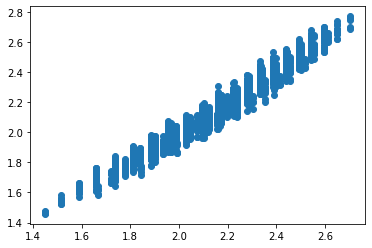

In [33]:
plt.scatter(prediction, y[:,0])

In [35]:
FEATURES[8]

'[W]'